#Problem Statement
Telecom companies face a major challenge in retaining their customers, as losing subscribers directly affects their revenue and growth. The Telco Customer Churn dataset provides information about a telecom company’s customers, including their demographic details, account information, and the services they use. The goal of this project is to analyze this data and build a machine learning model that can accurately predict whether a customer is likely to churn or not. By identifying patterns and key factors that contribute to customer churn—such as contract type, monthly charges, tenure, and service usage—the company can take proactive measures to improve customer satisfaction and reduce attrition. This predictive model will help the company focus on high-risk customers and develop effective retention strategies.

# Dataset Column Descriptions
customerID: A unique code used to identify each customer.

gender: Whether the customer is male or female.

SeniorCitizen: Shows if the customer is a senior citizen (1 means yes, 0 means no).

Partner: Tells us if the customer has a partner (Yes or No).

Dependents: Lets us know if the customer has people depending on them, like children or family members (Yes or No).

tenure: The number of months the customer has been with the company.

PhoneService: Indicates whether the customer has a phone connection through the company.

MultipleLines: Shows if the customer has more than one phone line, or none at all.

InternetService: What kind of internet service the customer is using — DSL, fiber optic, or none.

OnlineSecurity: Whether the customer has added online security to their internet plan.

OnlineBackup: Whether the customer has opted for automatic online data backup.

DeviceProtection: Tells us if the customer has taken protection for their internet-connected devices.

TechSupport: Whether the customer gets technical support from the company.

StreamingTV: Whether the customer uses the internet to stream TV shows.

StreamingMovies: Whether the customer uses the internet to stream movies.

Contract: The type of agreement the customer has — month-to-month, one-year, or two-year.

PaperlessBilling: Shows if the customer receives bills digitally instead of on paper.

PaymentMethod: How the customer pays their bill (like through electronic check or mail).

MonthlyCharges: The amount the customer is charged each month.

TotalCharges: The total amount the customer has paid so far.

Churn: Whether the customer has left the company or not — this is the value we’re trying to predict.

In [424]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [425]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [427]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


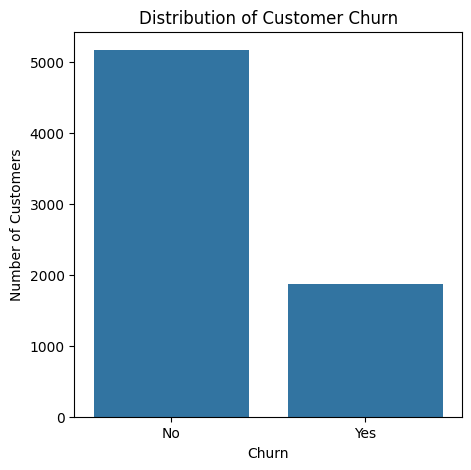

In [428]:
# The 'Churn' class has been oversampled to address class imbalance
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

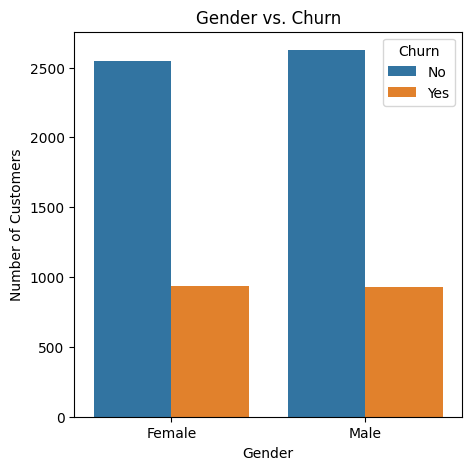

In [429]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Gender vs. Churn')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

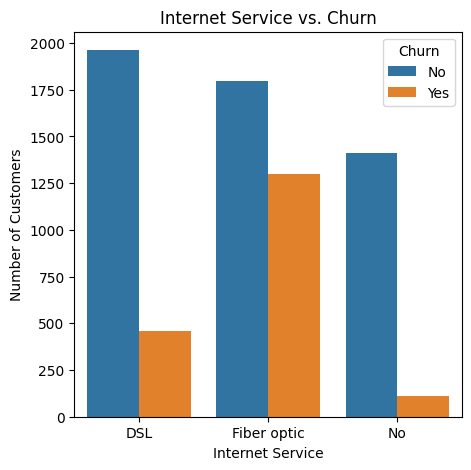

In [430]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Internet Service vs. Churn')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.show()

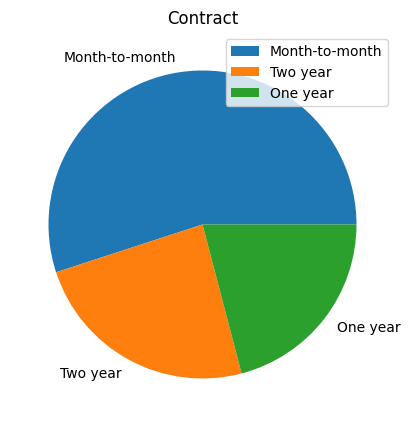

In [431]:
Contract = df['Contract'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(Contract,labels=Contract.index)
plt.title('Contract')
plt.legend(labels=Contract.index)
plt.show()

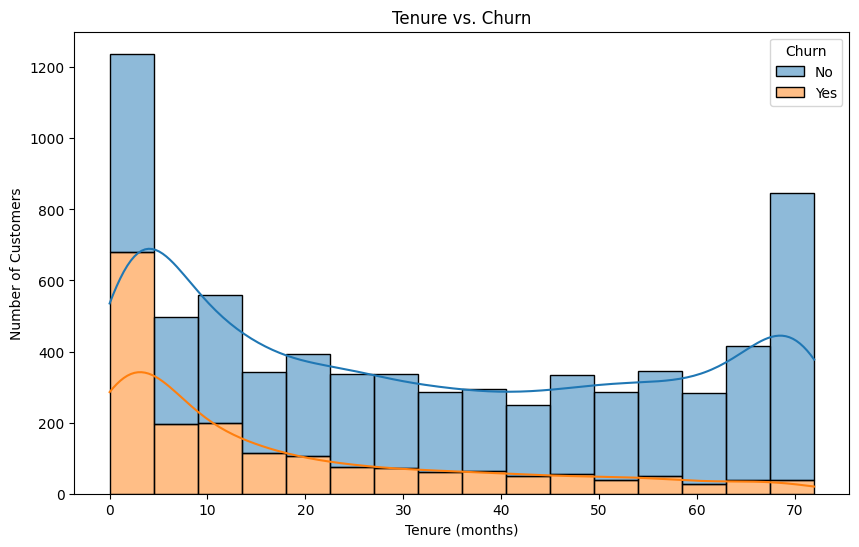

In [432]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Tenure vs. Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()

In [433]:
df.drop(["customerID"],inplace=True,axis=1) # customerID is not need for prediction

In [434]:
print(df['Contract'].unique())   # check ordinal or not
print(df['InternetService'].unique())
print(df['PaymentMethod'].unique())
print(df['OnlineSecurity'].unique())
print(df['OnlineBackup'].unique())
print(df['TechSupport'].unique())
print(df['DeviceProtection'].unique())
print(df['StreamingTV'].unique())
print(df['StreamingMovies'].unique())

['Month-to-month' 'One year' 'Two year']
['DSL' 'Fiber optic' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


In [435]:
df['Contract'].replace(['Month-to-month','One year','Two year'],[0,1,2],inplace=True) # it's a ordinal data then replace it

In [436]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [437]:
df['gender']=le.fit_transform(df['gender'])
df['Partner']=le.fit_transform(df['Partner'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['PhoneService']=le.fit_transform(df['PhoneService'])
df['MultipleLines']=le.fit_transform(df['MultipleLines'])
df['InternetService']=le.fit_transform(df['InternetService'])
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])
df['TotalCharges']=le.fit_transform(df['TotalCharges'])
df['Churn']=le.fit_transform(df['Churn'])

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


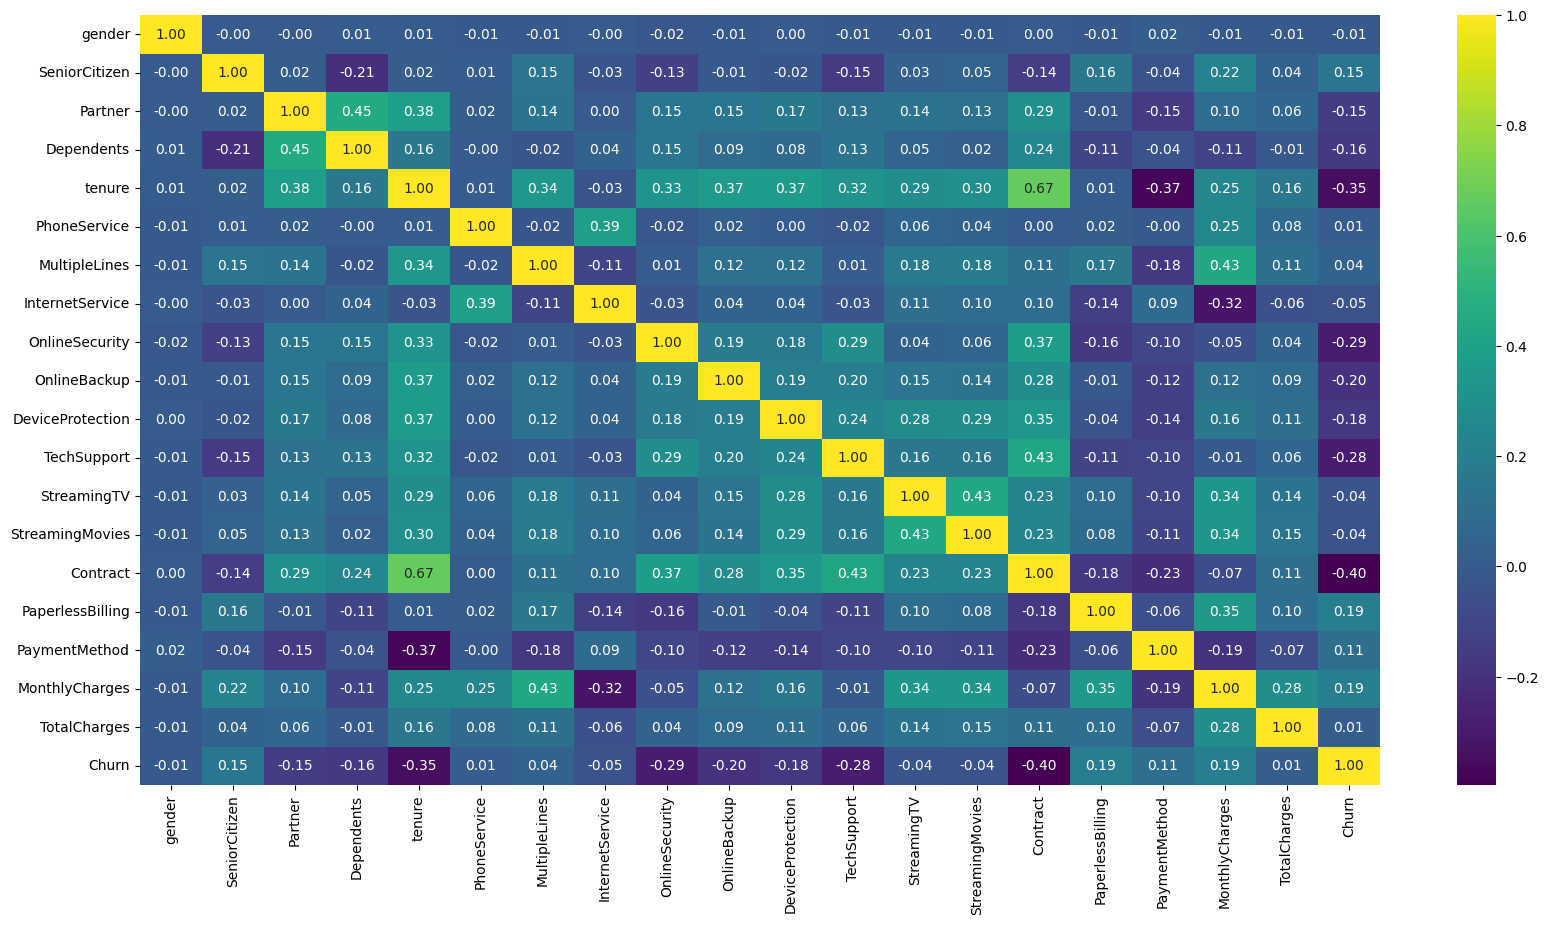

In [439]:
co=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(co,annot=True,fmt="0.2f",cmap="viridis")
plt.show()

<Axes: >

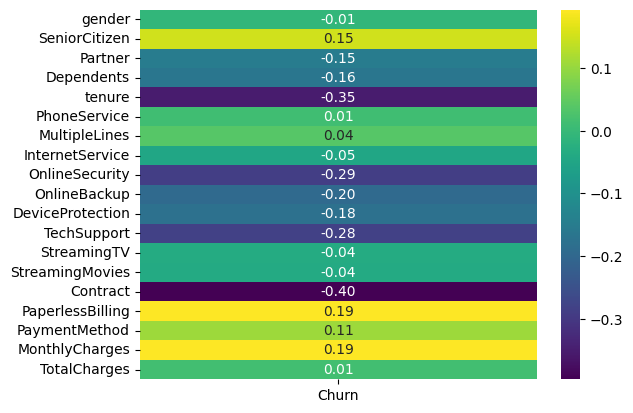

In [440]:
churn=df.corr()['Churn'].drop('Churn')
sns.heatmap(churn.to_frame(),annot=True,fmt='0.2f',cmap="viridis")

In [441]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [442]:
# drop the unwanted items
df.drop(['gender','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies','TechSupport','TotalCharges'],inplace=True,axis=1)

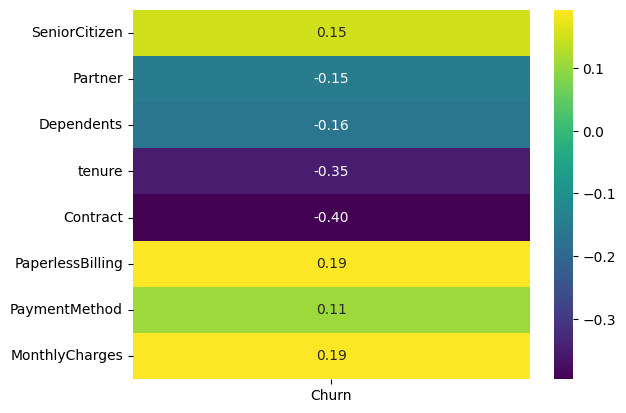

In [443]:
churn=df.corr()['Churn'].drop('Churn')
sns.heatmap(churn.to_frame(),annot=True,fmt='0.2f',cmap="viridis")
plt.show()

In [444]:
from imblearn.over_sampling import SMOTE
x=df.drop('Churn',axis=1)
y=df['Churn']
smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(x,y)
df=pd.concat([X_resampled,y_resampled],axis=1)

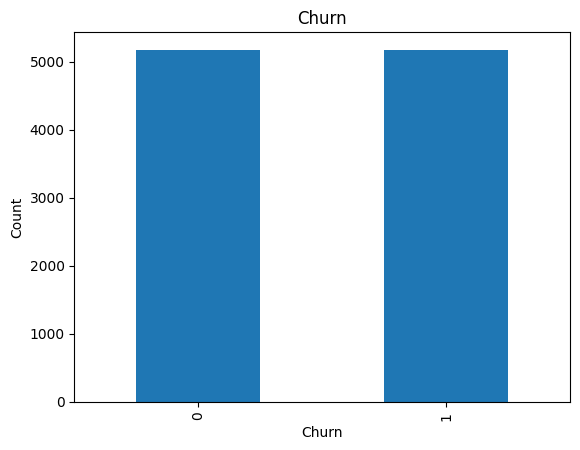

In [445]:
df["Churn"].value_counts().plot(kind='bar')
plt.title('Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [446]:
x=df.drop(['Churn'],axis=1)

In [447]:
y=df["Churn"]

In [448]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [449]:
model.fit(x_train,y_train)

LogisticRegression()

In [450]:
model.predict(x_test)

array([1, 1, 0, ..., 0, 1, 1])

In [451]:
model.score(x_test,y_test)

0.7707769617317356

# Remmove Outliers

In [452]:
 def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:
        # Skip the specified column
        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify the column to exclude
df_cleaned = remove_outliers_iqr(df, exclude_column='Churn')
df_cleaned

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,0,1,2,29.850000,0
1,0,0,0,34,1,0,3,56.950000,0
2,0,0,0,2,0,1,3,53.850000,1
3,0,0,0,45,1,0,0,42.300000,0
4,0,0,0,2,0,1,2,70.700000,1
...,...,...,...,...,...,...,...,...,...
10343,0,0,0,4,0,1,2,79.347002,1
10344,0,0,0,2,0,1,1,40.341820,1
10345,0,0,0,9,0,0,2,45.381666,1
10346,0,0,0,8,0,0,2,19.698369,1


In [453]:
 x=df_cleaned.drop('Churn',axis=1)
 y=df_cleaned["Churn"]

In [454]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [455]:
model.fit(x_train,y_train)

LogisticRegression()

In [456]:
model.predict(x_test)

array([0, 1, 1, ..., 1, 0, 1])

In [457]:
model.score(x_train,y_train)

0.7669746886299719

# Scaling

In [458]:
 x=df.drop('Churn',axis=1)
 y=df['Churn']

## standardscaler

In [459]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = StandardScaler()
x_stand_scaled = scaler.fit_transform(x)

In [460]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_stand_scaled,y,random_state=42)

In [461]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.7697461667310913

In [462]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# ---- Train/test split ----
x_train, x_test, y_train, y_test = train_test_split(
    x_stand_scaled, y, test_size=0.2, random_state=42
)


# ---- Define all models ----
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()

}

# ---- Train and Evaluate ----
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")

Logistic Regression: Accuracy = 0.7696
K-Nearest Neighbors: Accuracy = 0.8010
Decision Tree: Accuracy = 0.7894
Random Forest: Accuracy = 0.8150


## MinMax Scaler

In [463]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler2 = MinMaxScaler()
x_min_scaled = scaler2.fit_transform(x)

In [464]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_min_scaled,y,random_state=42)

In [465]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.7696173173560108

In [466]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# ---- Train/test split ----
x_train, x_test, y_train, y_test = train_test_split(
    x_min_scaled, y, test_size=0.2, random_state=42
)


# ---- Define all models ----
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()

}

# ---- Train and Evaluate ----
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")

Logistic Regression: Accuracy = 0.7710
K-Nearest Neighbors: Accuracy = 0.7966
Decision Tree: Accuracy = 0.7928
Random Forest: Accuracy = 0.8169


# KFold

In [467]:
X=df_cleaned.drop('Churn',axis=1)
y=df_cleaned["Churn"]

In [468]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [469]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
model=LogisticRegression()
for fold,(train_index,test_index)in enumerate(kf.split(X),1):
  print(f"\nfold {fold}")

  X_train,X_test=X.iloc[train_index],X.iloc[test_index]
  y_train,y_test=y.iloc[train_index],y.iloc[test_index]
  model.fit(X_train,y_train)
  y_pred= model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  print("Accuracy:", acc)


fold 1
Accuracy: 0.7778614457831325

fold 2
Accuracy: 0.7507530120481928

fold 3
Accuracy: 0.7929216867469879

fold 4
Accuracy: 0.7550866616428034

fold 5
Accuracy: 0.7543330821401658


In [470]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression()

# Track best fold data
best_accuracy = 0
best_fold = -1


# Save best fold's data
best_X_train = None
best_y_train = None
best_X_test = None
best_y_test = None

# Loop over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Fold {fold} Accuracy: {acc}")

    # Update best fold
    if acc > best_accuracy:
        best_accuracy = acc
        best_fold = fold
        best_X_train = X_train
        best_y_train = y_train
        best_X_test = X_test
        best_y_test = y_test

# Output best fold details
print(f"\n Best Fold: {best_fold} with Accuracy: {best_accuracy}")

Fold 1 Accuracy: 0.7778614457831325
Fold 2 Accuracy: 0.7507530120481928
Fold 3 Accuracy: 0.7929216867469879
Fold 4 Accuracy: 0.7550866616428034
Fold 5 Accuracy: 0.7543330821401658

 Best Fold: 3 with Accuracy: 0.7929216867469879


In [471]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define all models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each model
for model_name, model in models.items():
    print(f"\nModel: {model_name}")
    best_accuracy = 0
    best_fold = -1

    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train model
        model.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"  Fold {fold} Accuracy: {acc}")

        # Track best fold
        if acc > best_accuracy:
            best_accuracy = acc
            best_fold = fold

    print(f"Best Fold for {model_name}: Fold {best_fold} with Accuracy: {best_accuracy}")



Model: Logistic Regression
  Fold 1 Accuracy: 0.7778614457831325
  Fold 2 Accuracy: 0.7507530120481928
  Fold 3 Accuracy: 0.7929216867469879
  Fold 4 Accuracy: 0.7550866616428034
  Fold 5 Accuracy: 0.7543330821401658
Best Fold for Logistic Regression: Fold 3 with Accuracy: 0.7929216867469879

Model: Random Forest
  Fold 1 Accuracy: 0.8102409638554217
  Fold 2 Accuracy: 0.8230421686746988
  Fold 3 Accuracy: 0.8268072289156626
  Fold 4 Accuracy: 0.8085908063300679
  Fold 5 Accuracy: 0.8033157498116051
Best Fold for Random Forest: Fold 3 with Accuracy: 0.8268072289156626

Model: Naive Bayes
  Fold 1 Accuracy: 0.7537650602409639
  Fold 2 Accuracy: 0.7454819277108434
  Fold 3 Accuracy: 0.7703313253012049
  Fold 4 Accuracy: 0.7445365486058779
  Fold 5 Accuracy: 0.758854559155991
Best Fold for Naive Bayes: Fold 3 with Accuracy: 0.7703313253012049

Model: Decision Tree
  Fold 1 Accuracy: 0.7786144578313253
  Fold 2 Accuracy: 0.7816265060240963
  Fold 3 Accuracy: 0.7951807228915663
  Fold 4 Ac

# **Summary**

# Among all the models are tried using K-Fold cross-validation, Random Forest delivered the most accurate